In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# **Importing and wieving training data**

In [2]:
train = pd.read_csv('../input/spaceship-titanic/train.csv')

df_train = pd.DataFrame(data=train)

df_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


Text(0.5, 1.0, 'Checking Home Planet')

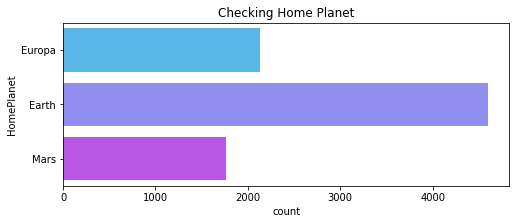

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,3))
sns.countplot(y = df_train['HomePlanet'], palette='cool')
plt.title('Checking Home Planet')

CryoSleep
False    5439
True     3037
dtype: int64


Text(0.5, 1.0, 'Checking Cryo Sleep')

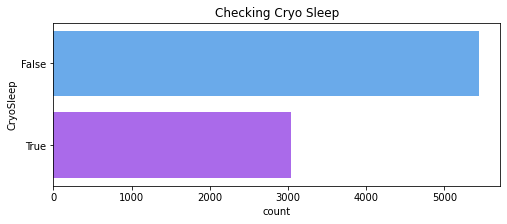

In [4]:
print(df_train.groupby('CryoSleep').size())

plt.figure(figsize=(8,3))
sns.countplot(y = df_train['CryoSleep'], palette='cool')
plt.title('Checking Cryo Sleep')

In [5]:
print(df_train.groupby('Cabin').size())

Cabin
A/0/P     2
A/0/S     2
A/1/S     3
A/10/P    1
A/10/S    1
         ..
T/0/P     1
T/1/P     1
T/2/P     1
T/2/S     1
T/3/P     1
Length: 6560, dtype: int64


Text(0.5, 1.0, 'Checking Destination')

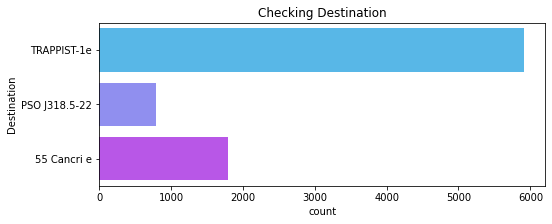

In [6]:
plt.figure(figsize=(8,3))
sns.countplot(y = df_train['Destination'], palette='cool')
plt.title('Checking Destination')

Text(0.5, 1.0, 'Checking Age')

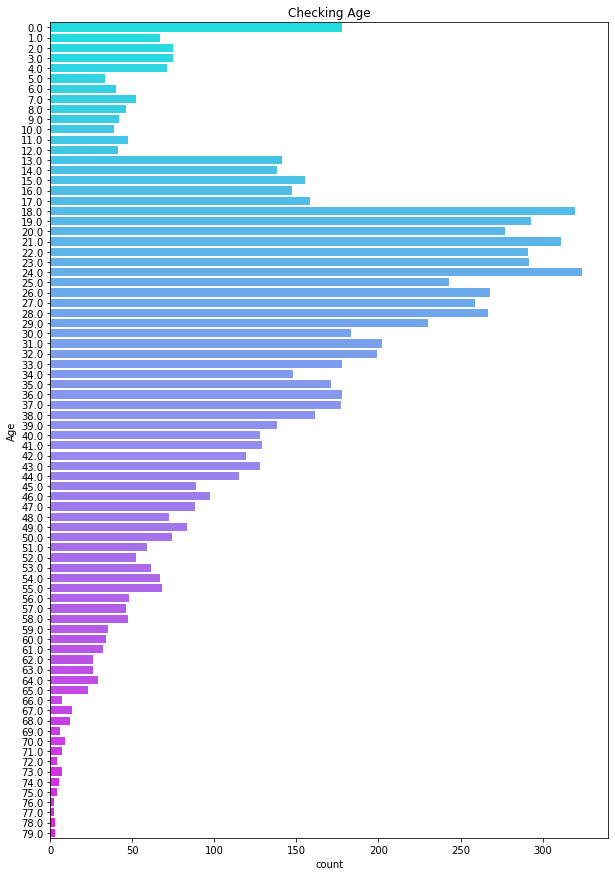

In [7]:
plt.figure(figsize=(10,15))
sns.countplot(y = df_train['Age'], palette='cool')
plt.title('Checking Age')

VIP
False    8291
True      199
dtype: int64


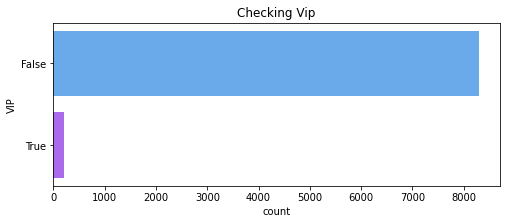

In [8]:
plt.figure(figsize=(8,3))
sns.countplot(y = df_train['VIP'], palette='cool')
plt.title('Checking Vip')

print(df_train.groupby('VIP').size())

In [9]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

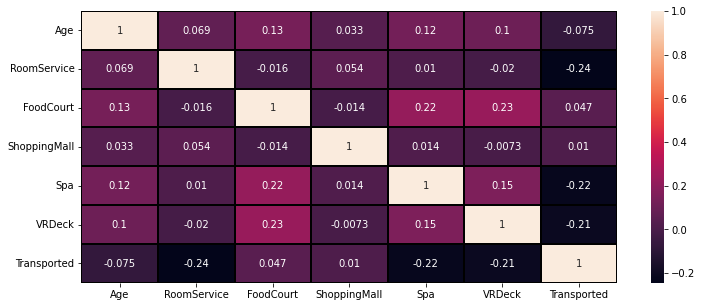

In [10]:
plt.figure(figsize=(12,5))
sns.heatmap(df_train.corr(), cmap='rocket', annot=True, linewidth=0.2, linecolor='black')

Preprocessing

In [11]:
df_train['HomePlanet'].fillna('Earth', inplace=True)
df_train['CryoSleep'].fillna(False, inplace=True)
df_train['Destination'].fillna('TRAPPIST-1e', inplace=True)
df_train['VIP'].fillna(False, inplace=True)
df_train['Age'].fillna(24.0, inplace=True)

l = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in l:
    value = df_train[i].mean()
    df_train[i] = df_train[i].fillna(value)

In [12]:
df_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

VIP
False    8494
True      199
dtype: int64


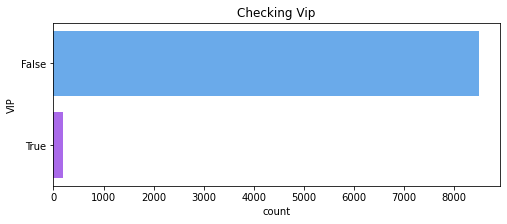

In [13]:
plt.figure(figsize=(8,3))
sns.countplot(y = df_train['VIP'], palette='cool')
plt.title('Checking Vip')

print(df_train.groupby('VIP').size())

In [14]:
names = df_train['Name'].str.split(' ', expand=True)
names.columns = ['FirstName', 'LastName']

df_train = pd.concat([df_train, names['LastName']],axis=1)
df_train['LastName'].fillna('None', inplace=True)

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,LastName
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Santantines


In [15]:
df_train[['Group', 'GroupNumber']] = df_train['PassengerId'].str.split('_', expand=True).astype('int32')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,LastName,Group,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Ofracculy,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Vines,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Susent,3,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Susent,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Santantines,4,1


In [16]:
df_train[['Group', 'LastName', 'Transported']].head(20)

,Group,LastName,Transported
0,1,Ofracculy,False
1,2,Vines,True
2,3,Susent,False
3,3,Susent,False
4,4,Santantines,True
5,5,Hinetthews,True
6,6,Jacostaffey,True
7,6,Jacostaffey,True
8,7,Beston,True
9,8,Flatic,True


In [17]:
df_train[['CabinDeck', 'CabinNum', 'CabinSide']] = df_train['Cabin'].str.split('/', expand=True)
df_train.drop(['Name', 'Cabin', 'VIP'], axis=1, inplace=True)

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,LastName,Group,GroupNumber,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False,Ofracculy,1,1,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True,Vines,2,1,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False,Susent,3,1,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False,Susent,3,2,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True,Santantines,4,1,F,1,S


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Cabin Feature')

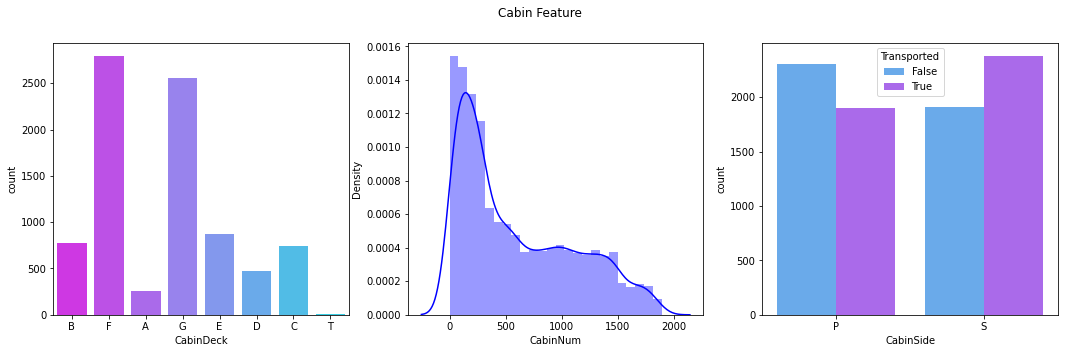

In [18]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
l = ['CabinDeck', 'CabinNum', 'CabinSide']
sns.countplot(df_train[l[0]], ax=ax[0], palette='cool_r')
sns.distplot(df_train[l[1]], ax=ax[1], color='blue')
sns.countplot(df_train[l[2]], ax=ax[2], palette='cool', hue=df_train['Transported'])
plt.suptitle('Cabin Feature')

In [19]:
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=15, labels=[i for i in range(1,16)])

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,LastName,Group,GroupNumber,CabinDeck,CabinNum,CabinSide,AgeGroup
0,0001_01,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,False,Ofracculy,1,1,B,0,P,8
1,0002_01,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True,Vines,2,1,F,0,S,5
2,0003_01,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,False,Susent,3,1,A,0,S,12
3,0003_02,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,False,Susent,3,2,A,0,S,7
4,0004_01,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True,Santantines,4,1,F,1,S,4


Text(0.5, 1.0, 'Checking Age Group')

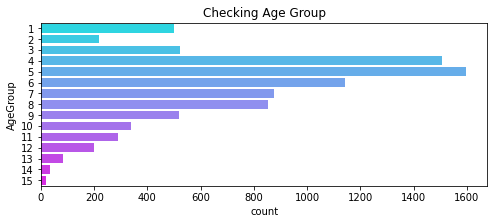

In [20]:
plt.figure(figsize=(8,3))
sns.countplot(y = df_train['AgeGroup'], palette='cool')
plt.title('Checking Age Group')

In [21]:
df_train['CabinDeck'] = df_train['CabinDeck'].fillna('F')
df_train['CabinSide'] = df_train['CabinSide'].fillna('S')
df_train['CabinNum'] = df_train['CabinNum'].fillna('82')

df_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
LastName        0
Group           0
GroupNumber     0
CabinDeck       0
CabinNum        0
CabinSide       0
AgeGroup        0
dtype: int64

In [22]:
df_train['LastName'].fillna('None', inplace=True)

df_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
LastName        0
Group           0
GroupNumber     0
CabinDeck       0
CabinNum        0
CabinSide       0
AgeGroup        0
dtype: int64

In [23]:
df_train['CabinNum'] = df_train['CabinNum'].astype('int64')
df_train['AgeGroup'] = df_train['AgeGroup'].astype('int64')

df_train['TotalAmount'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa'] + df_train['VRDeck']

for i in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df_train[f'{i}Used'] = df_train[i].apply(lambda x:1 if x>0 else 0)

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalAmount,RoomServiceUsed,FoodCourtUsed,ShoppingMallUsed,SpaUsed,VRDeckUsed
0,0001_01,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,...,B,0,P,8,0.0,0,0,0,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,...,F,0,S,5,736.0,1,1,1,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,...,A,0,S,12,10383.0,1,1,0,1,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,...,A,0,S,7,5176.0,0,1,1,1,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,...,F,1,S,4,1091.0,1,1,1,1,1


# **Feature Encoding**

In [24]:
planeti = pd.get_dummies(df_train['HomePlanet'], drop_first=True)
destinacija = pd.get_dummies(df_train['Destination'], drop_first=True)
side = pd.get_dummies(df_train['CabinSide'], drop_first=True)

df_train = pd.concat([df_train, planeti, destinacija, side], axis=1)

df_train.drop(['HomePlanet', 'Destination', 'CabinSide'], axis=1, inplace=True)

df_train.head()

,PassengerId,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,LastName,...,RoomServiceUsed,FoodCourtUsed,ShoppingMallUsed,SpaUsed,VRDeckUsed,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,S
0,0001_01,False,39.0,0.0,0.0,0.0,0.0,0.0,False,Ofracculy,...,0,0,0,0,0,1,0,0,1,0
1,0002_01,False,24.0,109.0,9.0,25.0,549.0,44.0,True,Vines,...,1,1,1,1,1,0,0,0,1,1
2,0003_01,False,58.0,43.0,3576.0,0.0,6715.0,49.0,False,Susent,...,1,1,0,1,1,1,0,0,1,1
3,0003_02,False,33.0,0.0,1283.0,371.0,3329.0,193.0,False,Susent,...,0,1,1,1,1,1,0,0,1,1
4,0004_01,False,16.0,303.0,70.0,151.0,565.0,2.0,True,Santantines,...,1,1,1,1,1,0,0,0,1,1


In [25]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df_train['LastName'] = label.fit_transform(df_train['LastName'])
df_train['CabinDeck'] = label.fit_transform(df_train['CabinDeck'])

In [26]:
df_train['CryoSleep'] = df_train['CryoSleep'].map({True:1, False:0})
#df_train['VIP'] = df_train['VIP'].map({True:1, False:0}) I droped this earlier
df_train['Transported'] = df_train['Transported'].map({True:1, False:0})

df_train.head()

,PassengerId,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,LastName,...,RoomServiceUsed,FoodCourtUsed,ShoppingMallUsed,SpaUsed,VRDeckUsed,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,S
0,0001_01,0,39.0,0.0,0.0,0.0,0.0,0.0,0,1432,...,0,0,0,0,0,1,0,0,1,0
1,0002_01,0,24.0,109.0,9.0,25.0,549.0,44.0,1,2110,...,1,1,1,1,1,0,0,0,1,1
2,0003_01,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1991,...,1,1,0,1,1,1,0,0,1,1
3,0003_02,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1991,...,0,1,1,1,1,1,0,0,1,1
4,0004_01,0,16.0,303.0,70.0,151.0,565.0,2.0,1,1779,...,1,1,1,1,1,0,0,0,1,1


<AxesSubplot:>

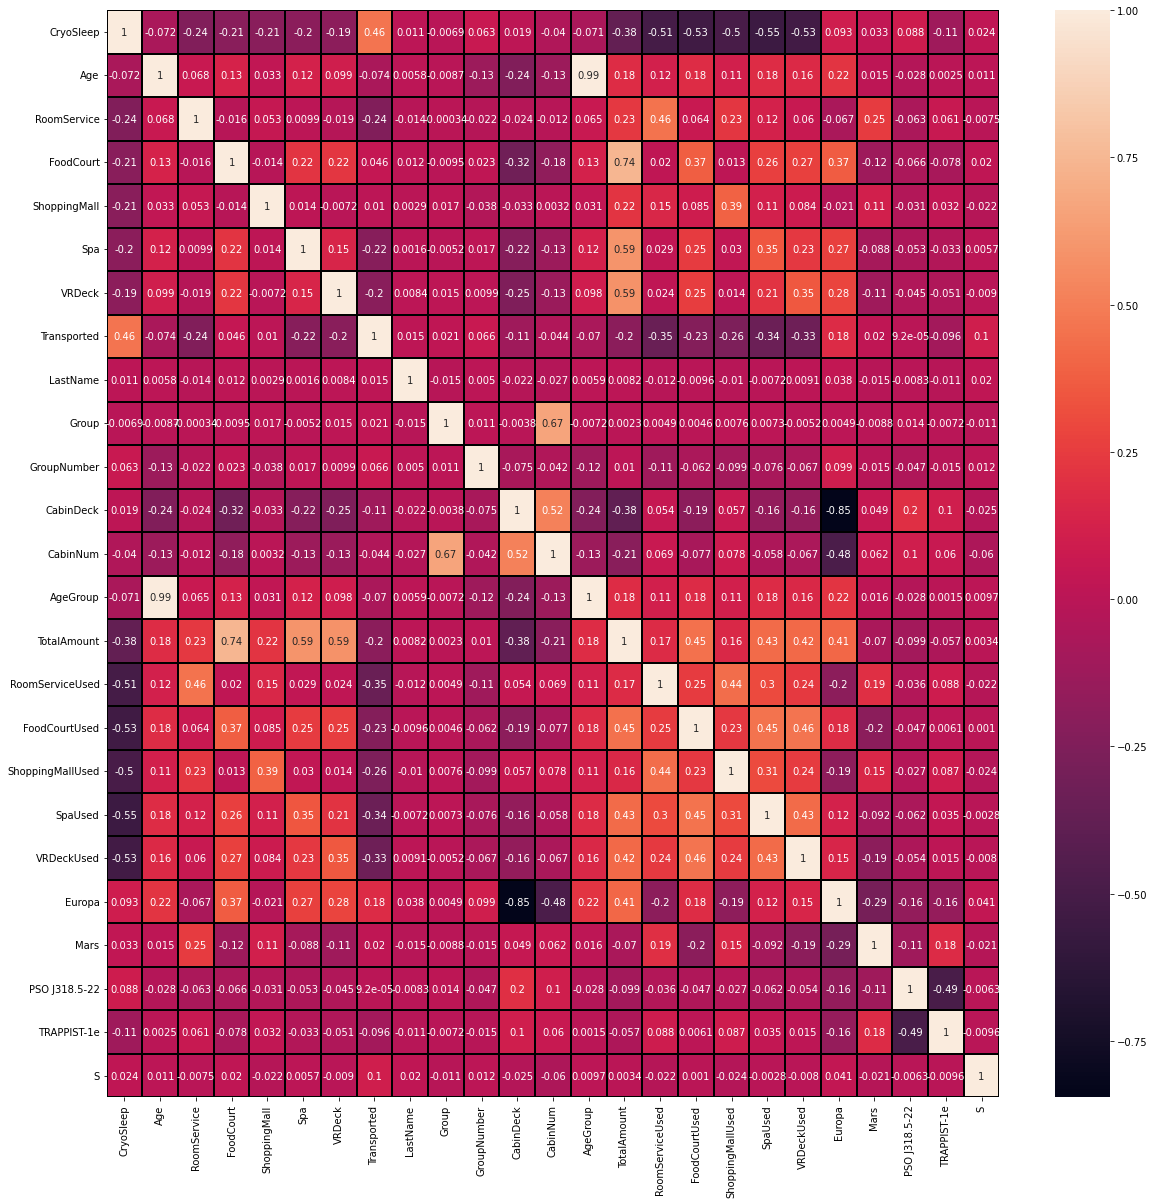

In [27]:
# another correlarion check due to new features
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), cmap='rocket', annot=True, linewidth=0.2, linecolor='black')

**Conclustions** <br><br>
**CabinDeck** and Europa are highly correlated so I'm droping Europa.<br>
**CryoSleep** is correlated with Spa, food, Shoping,... so I'm dropping it

In [28]:
df_train.drop(['Europa', 'CryoSleep'], axis=1, inplace=True)

In [29]:
df_train.to_csv('df_train_cleaned.csv')

# **Test data**

In [30]:
test = pd.read_csv('../input/spaceship-titanic/test.csv')

df_test = pd.DataFrame(data=test)

df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [31]:
df_test['HomePlanet'].fillna('Earth', inplace=True)
df_test['CryoSleep'].fillna(False, inplace=True)
df_test['Destination'].fillna('TRAPPIST-1e', inplace=True)
df_test['VIP'].fillna(False, inplace=True)
df_test['Age'].fillna(24.0, inplace=True)

df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [32]:
l = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in l:
    value = df_test[i].mean()
    df_test[i] = df_test[i].fillna(value)

df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [33]:
names = df_test['Name'].str.split(' ', expand=True)
names.columns = ['FirstName', 'LastName']

df_test = pd.concat([df_test, names['LastName']],axis=1)
df_test['LastName'].fillna('None', inplace=True)

df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,LastName
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,Harperez


In [34]:
df_test[['Group', 'GroupNumber']] = df_test['PassengerId'].str.split('_', expand=True).astype('int32')

df_test[['CabinDeck', 'CabinNum', 'CabinSide']] = df_test['Cabin'].str.split('/', expand=True)
df_test.drop(['Name', 'Cabin'], axis=1, inplace=True)

df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=10, labels=[i for i in range(1,11)])

df_test['CabinDeck'] = df_test['CabinDeck'].fillna('F')
df_test['CabinSide'] = df_test['CabinSide'].fillna('S')
df_test['CabinNum'] = df_test['CabinNum'].fillna('82')

df_test['CabinNum'] = df_test['CabinNum'].astype('int64')
df_test['AgeGroup'] = df_test['AgeGroup'].astype('int64')

df_test['TotalAmount'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']

for i in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df_test[f'{i}Used'] = df_test[i].apply(lambda x:1 if x>0 else 0)

planeti = pd.get_dummies(df_test['HomePlanet'], drop_first=True)
destinacije = pd.get_dummies(df_test['Destination'], drop_first=True)
side = pd.get_dummies(df_test['CabinSide'], drop_first=True)

df_test = pd.concat([df_test, planeti, destinacije, side], axis=1)
df_test.drop(['HomePlanet', 'Destination', 'CabinSide'], axis=1, inplace=True)

df_test['LastName'] = label.fit_transform(df_test['LastName'])
df_test['CabinDeck'] = label.fit_transform(df_test['CabinDeck'])

df_test['CryoSleep'] = df_test['CryoSleep'].map({True:1, False:0})
#df_test['VIP'] = df_test['VIP'].map({True:1, False:0})

df_test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,LastName,...,RoomServiceUsed,FoodCourtUsed,ShoppingMallUsed,SpaUsed,VRDeckUsed,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,S
0,0013_01,1,27.0,False,0.0,0.0,0.0,0.0,0.0,275,...,0,0,0,0,0,0,0,0,1,1
1,0018_01,0,19.0,False,0.0,9.0,0.0,2823.0,0.0,1191,...,0,1,0,1,0,0,0,0,1,1
2,0019_01,1,31.0,False,0.0,0.0,0.0,0.0,0.0,1605,...,0,0,0,0,0,1,0,0,0,1
3,0021_01,0,38.0,False,0.0,6652.0,0.0,181.0,585.0,262,...,0,1,0,1,1,1,0,0,1,1
4,0023_01,0,20.0,False,10.0,0.0,635.0,0.0,0.0,736,...,1,0,1,0,0,0,0,0,1,1


In [35]:
df_test.drop(['Europa', 'VIP', 'CryoSleep'], axis=1, inplace=True)

df_test.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,LastName,Group,GroupNumber,...,TotalAmount,RoomServiceUsed,FoodCourtUsed,ShoppingMallUsed,SpaUsed,VRDeckUsed,Mars,PSO J318.5-22,TRAPPIST-1e,S
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,275,13,1,...,0.0,0,0,0,0,0,0,0,1,1
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,1191,18,1,...,2832.0,0,1,0,1,0,0,0,1,1
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,1605,19,1,...,0.0,0,0,0,0,0,0,0,0,1
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,262,21,1,...,7418.0,0,1,0,1,1,0,0,1,1
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,736,23,1,...,645.0,1,0,1,0,0,0,0,1,1


In [36]:
X_test = df_test.drop('PassengerId', axis=1)

X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,LastName,Group,GroupNumber,CabinDeck,...,TotalAmount,RoomServiceUsed,FoodCourtUsed,ShoppingMallUsed,SpaUsed,VRDeckUsed,Mars,PSO J318.5-22,TRAPPIST-1e,S
0,27.0,0.0,0.0,0.0,0.0,0.0,275,13,1,6,...,0.0,0,0,0,0,0,0,0,1,1
1,19.0,0.0,9.0,0.0,2823.0,0.0,1191,18,1,5,...,2832.0,0,1,0,1,0,0,0,1,1
2,31.0,0.0,0.0,0.0,0.0,0.0,1605,19,1,2,...,0.0,0,0,0,0,0,0,0,0,1
3,38.0,0.0,6652.0,0.0,181.0,585.0,262,21,1,2,...,7418.0,0,1,0,1,1,0,0,1,1
4,20.0,10.0,0.0,635.0,0.0,0.0,736,23,1,5,...,645.0,1,0,1,0,0,0,0,1,1


In [37]:
df_test.to_csv('df_test_cleaned.csv')

Modeling

In [38]:
from sklearn.model_selection import train_test_split

X = df_train.drop(['PassengerId', 'Transported'], axis=1)
y = df_train['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1312)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6954, 22), (1739, 22), (6954,), (1739,))

In [39]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [40]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [41]:
LR_score = get_score(LinearRegression(),X_train,X_test,y_train,y_test)

print('LR_score ' + str(LR_score))

DTC_score = get_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)

print('DTC_score ' + str(DTC_score))

DTR_score = get_score(DecisionTreeRegressor(),X_train,X_test,y_train,y_test)

print('DTR_score ' + str(DTR_score))

LR_score 0.35620786559662587
DTC_score 0.7377803335250144
DTR_score -0.012319937341899623


In [42]:
from sklearn.model_selection import GridSearchCV 

#tree = DecisionTreeClassifier()

# Create the grid parameter:
#grid_rf = {'criterion': ['entropy', 'gini'],
#           'splitter': ['best', 'random'],
#           'max_depth': [5, 7, 9], #[None,1,3,5],
#           'min_samples_split': range(2, 7),
#           'max_features': ['auto', 'sqrt', 'log2']
#          }

print('Korak 1')

# Create the grid:
#gs_rf = GridSearchCV(tree, grid_rf, cv=3, n_jobs=-1)

print('Korak 2')

# Fit using grid search:
#gs_rf.fit(X_train, y_train)

print('Korak 3')

# Print best accuracy and best parameters:
#print('Best accuracy: %.3f' % gs_rf.best_score_)
#print('\nBest params:\n', gs_rf.best_params_)

Korak 1
Korak 2
Korak 3


In [43]:
#BestParams=
 #{'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'min_samples_split': 6, 'splitter': 'best'}

In [44]:
model = DecisionTreeClassifier(criterion= 'gini',
                               max_depth= 9, 
                               max_features= 'log2', 
                               min_samples_split= 6,
                               splitter= 'best')

model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, max_features='log2', min_samples_split=6)

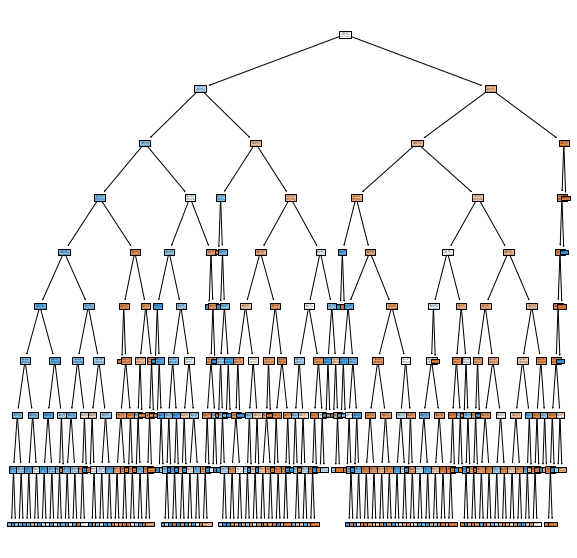

In [45]:
from sklearn import tree

#tree.plot_tree(model)

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(model,
                   filled=True)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)


print('\nAccuracy train set:\n', accuracy_score(y_train, y_pred_train))
print('\nAccuracy test set:\n', accuracy_score(y_test, y_pred_test))



Accuracy train set:
 0.8080241587575496

Accuracy test set:
 0.7797584818861415


In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       4277 non-null   object 
 1   Age               4277 non-null   float64
 2   RoomService       4277 non-null   float64
 3   FoodCourt         4277 non-null   float64
 4   ShoppingMall      4277 non-null   float64
 5   Spa               4277 non-null   float64
 6   VRDeck            4277 non-null   float64
 7   LastName          4277 non-null   int64  
 8   Group             4277 non-null   int32  
 9   GroupNumber       4277 non-null   int32  
 10  CabinDeck         4277 non-null   int64  
 11  CabinNum          4277 non-null   int64  
 12  AgeGroup          4277 non-null   int64  
 13  TotalAmount       4277 non-null   float64
 14  RoomServiceUsed   4277 non-null   int64  
 15  FoodCourtUsed     4277 non-null   int64  
 16  ShoppingMallUsed  4277 non-null   int64  


In [48]:
df_test=df_test.drop(["PassengerId"],axis=1)

In [49]:
result = model.predict(df_test)

print(result)

[1 0 1 ... 1 0 1]


In [50]:
label_res=[]
for i in result:
    if(i==1):
        label_res.append("True")
    elif(i==0):
        label_res.append("False")
        
label_=pd.DataFrame(label_res,columns=["Transported"])

label_.head()

,Transported
0,True
1,False
2,True
3,True
4,True


In [51]:
df_sample = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")

df_sample.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [52]:
df_sample = df_sample.drop(["Transported"],axis=1)

df_submission = pd.concat([df_sample,label_],axis=1)

df_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [53]:
df_submission.to_csv("submission.csv",index=False)

In [54]:
!kaggle competitions submit -c spaceship-titanic -f submission.csv -m "Message"

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
